<a href="https://colab.research.google.com/github/jesusvillota/CSS_DataScience_2025/blob/main/Session1/1_2_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="max-width: 880px; margin: 20px auto 22px; padding: 0px; border-radius: 18px; border: 1px solid #e5e7eb; background: linear-gradient(180deg, #ffffff 0%, #f9fafb 100%); box-shadow: 0 8px 26px rgba(0,0,0,0.06); overflow: hidden;">

  <!-- Banner Header -->
  <div style="padding: 34px 32px 14px; text-align: center; line-height: 1.38;">
    <div style="font-size: 13px; letter-spacing: 0.14em; text-transform: uppercase; color: #6b7280; font-weight: bold; margin-bottom: 5px;">
      Session #1
    </div>
    <div style="font-size: 29px; font-weight: 800; color: #14276c; margin-bottom: 4px;">
      Scrape it like you mean it!
    </div>
    <div style="font-size: 16.5px; color: #374151; font-style: italic; margin-bottom: 0;">
      Using Textual Data in Empirical Monetary Economics
    </div>
  </div>

  <!-- Logo Section -->
  <div style="background: none; text-align: center; margin: 30px 0 10px;">
    <img src="https://www.cemfi.es/images/Logo-Azul.png" alt="CEMFI Logo" style="width: 158px; filter: drop-shadow(0 2px 12px rgba(56,84,156,0.05)); margin-bottom: 0;">
  </div>

  <!-- Name -->
  <div style="font-family: 'Times New Roman', Times, serif; color: #38549c; text-align: center; font-size: 1.22em; font-weight: bold; margin-bottom: 0px;">
    Jesus Villota Miranda © 2025
  </div>

  <!-- Contact info -->
  <div style="font-family: 'Times New Roman', Times, serif; color: #38549c; text-align: center; font-size: 1em; margin-top: 7px; margin-bottom: 20px;">
    <a href="mailto:jesus.villota@cemfi.edu.es" style="color: #38549c; text-decoration: none; margin-right:8px;" title="Email">
      <!-- Email logo -->
      <!-- <img src="https://cdn-icons-png.flaticon.com/512/11679/11679732.png" alt="Email" style="width:18px; vertical-align:middle; margin-right:5px;"> -->
      jesus.villota@cemfi.edu.es
    </a>
    <span style="color:#9fa7bd;">|</span>
    <a href="https://www.linkedin.com/in/jesusvillotamiranda/" target="_blank" style="color: #38549c; text-decoration: none; margin-left:7px;" title="LinkedIn">
      <!-- LinkedIn logo -->
      <!-- <img src="https://1.bp.blogspot.com/-onvhHUdW1Us/YI52e9j4eKI/AAAAAAAAE4c/6s9wzOpIDYcAo4YmTX1Qg51OlwMFmilFACLcBGAsYHQ/s1600/Logo%2BLinkedin.png" alt="LinkedIn" style="width:17px; vertical-align:middle; margin-right:5px;"> -->
      LinkedIn
    </a>
  </div>
</div>


**IMPORTANT**: **Are you running this notebook in Google Colab?**

- If so, please make sure that in the cell below `running_in_colab` is set to `True`

- And, of course,  make sure to **run the cell**!

In [7]:
# ARE YOU RUNNING THIS IN GOOGLE COLAB? If YES, type True below
running_in_colab = False

---

# **1. Introduction to Web Scraping**

### Definition of Web Scraping:

Web Scraping is the automated process of extracting information from websites. This can include text, images, tables, and other data types.

### Why Scrape Data?:

- **Accessibility**: Many datasets are freely available online but not in a structured format. Scraping allows you to gather these datasets efficiently.
- **Real-time Data**: Scraping can provide real-time or frequently updated data, essential for market analysis or economic research.
- **Automation**: Automating data collection reduces time and human error.

### Ethical Considerations:

- **Legal Aspects**: Not all websites allow scraping. It’s important to check a website’s `robots.txt` file, which provides guidelines for web crawlers. Respect the website’s terms of service.
- **Ethical Practices**: Scrape responsibly—avoid making too many requests in a short period (rate limiting) to prevent overloading the website’s server.

### HTTP Status Codes:

When you request data from a webpage using Python, the server responds with an HTTP status code that indicates the result of the request. We want the HTTP Status to equal 200.


### Why Check for Status Code 200?

The status code 200 means the request was successful and the webpage is accessible. This is a good sign to proceed with scraping. If the status code is anything other than 200, it usually means there's an issue, and scraping should not proceed until the issue is resolved.

#### Common HTTP Status Codes:

- **200 (OK)**: The request was successful, and the server is returning the requested resource.
- **404 (Not Found)**: The requested resource could not be found on the server.
- **403 (Forbidden)**: The server understood the request but refuses to authorize it.
- **500 (Internal Server Error)**: The server encountered an unexpected condition that prevented it from fulfilling the request.



## **2. Libraries**

- `!pip install`: This command installs the necessary Python libraries.
- `requests` is used to handle HTTP requests
- `beautifulsoup4` (often abbreviated as `bs4`) is used to parse HTML and XML documents.

In [8]:
if running_in_colab:
    !pip install requests beautifulsoup4

In [9]:
# Importing libraries
import requests
from bs4 import BeautifulSoup

## **3. Checking Web Status**

- `requests.get()`: This function sends an HTTP GET request to the specified URL. It returns a response object containing the server’s response to the request.

- `response.status_code`: This attribute of the response object holds the HTTP status code. Printing it helps us check if the request was successful (200) or if there was an issue.

- Conditional Check (`if` statement):
This checks if the status code is 200. If it is, we proceed with parsing the webpage’s content.
If the status code is not 200, it indicates an issue (like 404 or 500), and we print an error message instead.

In [10]:
# Sending a GET request to a sample website
URL = 'https://www.cemfi.es/'

response = requests.get(URL)

# Checking the status code of the response
print(f"Status Code: {response.status_code}")

# If the response is successful, proceed with parsing
if response.status_code == 200:
    print(f"Successfully accessed the webpage {URL}")
else:
    print(f"Failed to access the webpage: {URL}")

Status Code: 200
Successfully accessed the webpage https://www.cemfi.es/


## **4. Getting the Raw Web Code**

- `response.content`: This attribute of the response object contains the content of the response in bytes. It represents the raw HTML of the webpage we requested.

- `BeautifulSoup(response.content, 'html.parser')`: This line initializes a BeautifulSoup object using the HTML content from `response.content` and specifies the parser to use (`'html.parser'`). This parser converts the HTML into a BeautifulSoup object, which can be navigated and searched.

In [11]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<!--[if IE 8]> <html lang="es" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="es" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="es">
<!--<![endif]--><head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="CEMFI | Institución creada por el Banco de España para la formación de postgrado y la investigación en el ámbito de la economía." name="description"/>
<meta content="Cemfi" name="author"/>
<title>CEMFI</title>
<link href="https://cemfi.es" rel="canonical"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<!-- Bootstrap core CSS -->
<link href="/assets/css/bootstrap.min.css" rel="styl

## **5. Extracting data from Raw Code Patterns**

### **5.1. Scrape all links**

This code demonstrates how to extract all hyperlinks from the CEMFI homepage:

1. **Send a GET request** to the website and retrieve its HTML content.
2. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
3. **Find all anchor tags** by locating all `<a>` elements on the page.
4. **Extract each link** by:
    - Getting the URL from the `href` attribute.
    - Optionally getting the link text with `.get_text(strip=True)`.
5. **Display or collect results** by iterating over the links and printing their `href` values; you may also store them in a list or DataFrame for later use.

The output in this example is a printed list of URLs extracted from the page.

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es"
response = requests.get(url)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all links
links = soup.find_all('a')

# Print all the hyperlinks
for link in links:
    print(link.get('href'))


/cookies.asp
/cookies.asp
javascript:acept_cookie()
/index.asp
/research/index.asp
/research/research_lines/index.asp
/research/research_lines/research_line.asp?q=macroeconomics
/research/research_lines/research_line.asp?q=microeconomics
/research/research_lines/research_line.asp?q=applied
/research/research_lines/research_line.asp?q=banking
/research/research_lines/research_line.asp?q=econometrics
/research/seminars/index.asp
/research/projects/index.asp
/research/mdm/index.asp
/research/conferences/index.asp
/research/collaborations/index.asp
/research/pub/index.asp
/research/publications/index.asp
/programs/index.asp
/programs/banca_central/index.asp
/programs/master/index.asp
/programs/phd/index.asp
/programs/internship/index.asp
/programs/css/index.asp
/programs/dsb/index.asp
/people/index.asp
/people/faculty/index.asp
/people/faculty/index_ext.asp
/people/visitors/index.asp
/people/research/index.asp
/people/faculty/index_PhD.asp
/people/staff/index.asp
/about/index.asp
/about/wh

### **5.2. Scraping the Navigation Menu**

This code demonstrates how to extract the main navigation sections from the CEMFI homepage:

1. **Send a GET request** to the website and retrieve its HTML content.
2. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
3. **Locate the navigation menu** by finding the `<ul>` with `id='cemfi-menu-top'` and selecting all items with class `nav-item`.
4. **Extract each navigation item** by:
    - Getting the section name (text) from the `<a>` tag.
    - Getting the URL from the `href` attribute of the `<a>` tag.
    - Appending each pair as a dictionary to a list.
5. **Store the results** in a list of dictionaries and convert it to a pandas DataFrame for easy viewing.

The output is a DataFrame (`df_nav_links`) listing each navigation Section and its corresponding Link.

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es"
response = requests.get(url)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Locate the navigation menu
nav_items = soup.find('ul', id='cemfi-menu-top').find_all('li', class_='nav-item')

# Step 4: Extract the text and links
nav_links = []
for item in nav_items:
    section = item.find('a').get_text(strip=True)
    link = item.find('a')['href']
    nav_links.append({'Section': section, 'Link': link})

# Step 5: Convert the list of dictionaries to a DataFrame
df_nav_links = pd.DataFrame(nav_links)

df_nav_links


,Section,Link
0,Research,/research/index.asp
1,Programs,/programs/index.asp
2,People,/people/index.asp
3,About,/about/index.asp


### **5.3. Scraping Social Media Links from the Footer**

This code demonstrates how to extract social media links from the footer of the CEMFI website:

1. **Send a GET request** to the website and retrieve its HTML content.
2. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
3. **Locate the footer section** and find the list of social media links (`ul.social-list`).
4. **Extract each social media link** by:
    - Getting the platform name from the `alt` attribute of the `<img>` tag.
    - Getting the URL from the `href` attribute of the `<a>` tag.
5. **Store the results** in a list of dictionaries, then convert it to a pandas DataFrame for easy viewing.

The output is a DataFrame (`df_social_media`) listing each social media platform and its corresponding URL.


In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es"
response = requests.get(url)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Locate the footer social links
footer = soup.find('footer')
social_links = footer.find('ul', class_='social-list').find_all('a')

# Step 4: Extract social media links
social_media = []
for link in social_links:
    platform = link.find('img')['alt']
    url = link['href']
    social_media.append({'Platform': platform, 'URL': url})

# Display the scraped social media links
df_social_media = pd.DataFrame(social_media)

df_social_media


,Platform,URL
0,Linkedin,https://www.linkedin.com/school/cemfi/
1,Facebook,https://www.facebook.com/CEMFInews
2,Twitter,https://twitter.com/cemfinews
3,Instagram,https://www.instagram.com/cemfinews/
4,Bluesky,https://bsky.app/profile/cemfi.es


### **5.4. Scraping the Event Schedule**

This code demonstrates how to extract the upcoming event schedule from the CEMFI homepage:

1. **Send a GET request** to the website and retrieve its HTML content.
2. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
3. **Locate the events carousel** by finding the section with `id='blq-carousel-eventos'` that contains event entries.
4. **Extract each event** by:
    - Getting the date from the `<div class='date'>` element.
    - Getting the time from the `<div class='time'>` element.
    - Getting the seminar title from the `<h4 class='event-title'>` element.
    - Getting the presenter/description from the `<p class='event-text'>` element.
5. **Store the results** in a list of dictionaries and convert it to a pandas DataFrame for easy viewing and analysis.

The output is a DataFrame (`df_events`) listing each event with its Date, Time, Seminar, and Presenter.

This approach can be adapted to scrape similar schedules from other websites by adjusting the HTML selectors.

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es"
response = requests.get(url)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Locate the events carousel
event_items = soup.find('section', id='blq-carousel-eventos').find_all('div', class_='event')

# Step 4: Extract event details
events = []
for event in event_items:
    date = event.find('div', class_='date').get_text(strip=True)
    time = event.find('div', class_='time').get_text(strip=True)
    title = event.find('h4', class_='event-title').get_text(strip=True)
    description = event.find('p', class_='event-text').get_text(strip=True)
    events.append({'Date': date, 'Time': time, 'Seminar': title, 'Presenter': description})

# Display the scraped events
df_events = pd.DataFrame(events)

df_events


,Date,Time,Seminar,Presenter
0,12SEP,13:30h,MadMac Seminar,Matias Covarrubias (Banco de España) presents ...
1,17SEP,13:30h,MadMac Seminar,joint FIRMS - David Rahman (University of Minn...
2,17SEP,13:30h,FIRMS Seminar,joint MadMac - David Rahman (University of Min...
3,26SEP,13:30h,MadMac Seminar,Matthias Doepke (London School of Economics) p...
4,30SEP,13:30h,Econometrics Seminar,Graciela Sanromán (Universidad de la República...


### **5.5. Scraping the Publications**

This code demonstrates how to extract recent publications listed on the CEMFI homepage:

1. **Send a GET request** to the website and retrieve its HTML content.
2. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
3. **Locate the publications section** by finding the section with `id='blq-last-pubs'` and selecting each publication item (`div.item-lp`).
4. **Extract each publication** by:
    - Getting the paper title from the `<a class='link-primary'>` element.
    - Getting the authors from the first `<p>` within `div.lp-body`.
    - Getting the journal info from the second `<p>` within `div.lp-body`.
5. **Store the results** in a list of dictionaries and convert it to a pandas DataFrame for easy viewing and analysis.

The output is a DataFrame (`df_publications`) listing each paper’s Title, Authors, and Journal.

In [16]:
import requests
from bs4 import BeautifulSoup

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es"
response = requests.get(url)

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Locate recent publications
pub_items = soup.find('section', id='blq-last-pubs').find_all('div', class_='item-lp')

# Step 4: Extract publication details
publications = []
for pub in pub_items:
    title = pub.find('a', class_='link-primary').get_text(strip=True)
    authors = pub.find('div', class_='lp-body').find_all('p')[0].get_text(strip=True)
    journal = pub.find('div', class_='lp-body').find_all('p')[1].get_text(strip=True)
    publications.append({'Paper Title': title, 'Authors': authors, 'Journal': journal})

# Display the scraped publications
df_publications = pd.DataFrame(publications)

df_publications


,Paper Title,Authors,Journal
0,The COVID-19 curtain: Can past communist regim...,"Inés Berniell, Yarine Fawaz, Anne\r\n Laferrer...","Social Science and Medicine, 2023."
1,Using Multiple Outcomes to Improve the Synthet...,"Eli Ben-Michael, Avi Feller and Liyang Sun","Review of Economics and Statistics, 2025."
2,Rethinking the welfare state,"Nezih Guner, Remzi Kaygusuz and Gustavo Ventura","Econometrica, 2023."
3,Micro and macro effects of UI policies: Eviden...,"Fatih Karahan, Kurt Mitman and Brendan Moore","Journal of Political Economy, 2025."
4,Moral Hazard and Debt Maturity,Gur Huberman and Rafael Repullo,"Journal of Financial Intermediation, 2025."


### **5.6. Scraping the Images (Homepage Carousel)**

This code demonstrates how to extract and preview images from the homepage carousel on the CEMFI website:

1. **Send a GET request** to the website and retrieve its HTML content.
2. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
3. **Locate the carousel** by finding the `div` with `id='carousel-portada'` and selecting each `div.carousel-item`.
4. **Extract each image** by:
    - Getting the image source (`src`) from the nested `<img>` tag.
    - Converting relative URLs to absolute if necessary.
5. **Display the results** by iterating over collected URLs and rendering images inline (e.g., with `IPython.display.Image`).

The output is a sequence of images displayed within the notebook; you can also store the URLs for later download.

Successfully accessed the webpage!


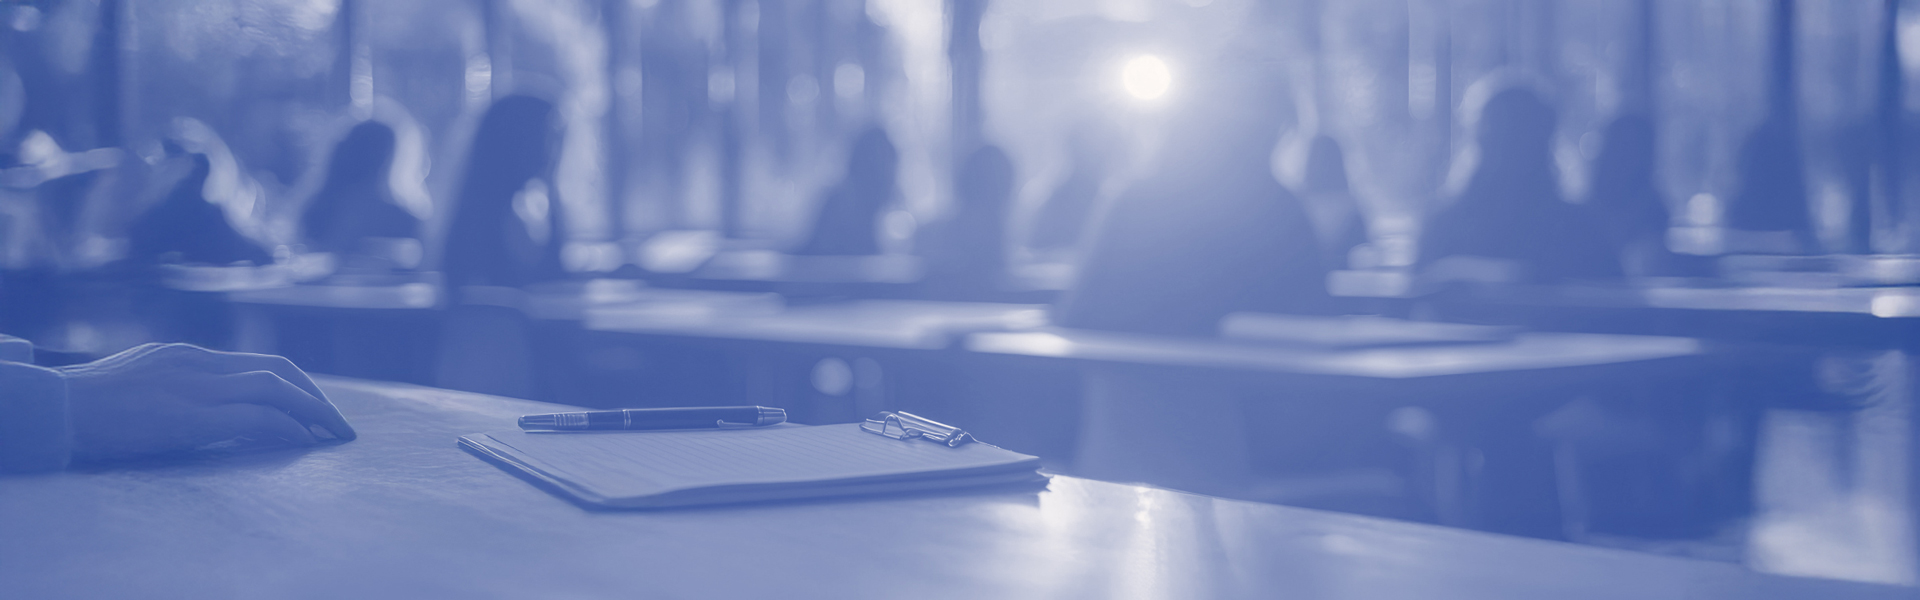

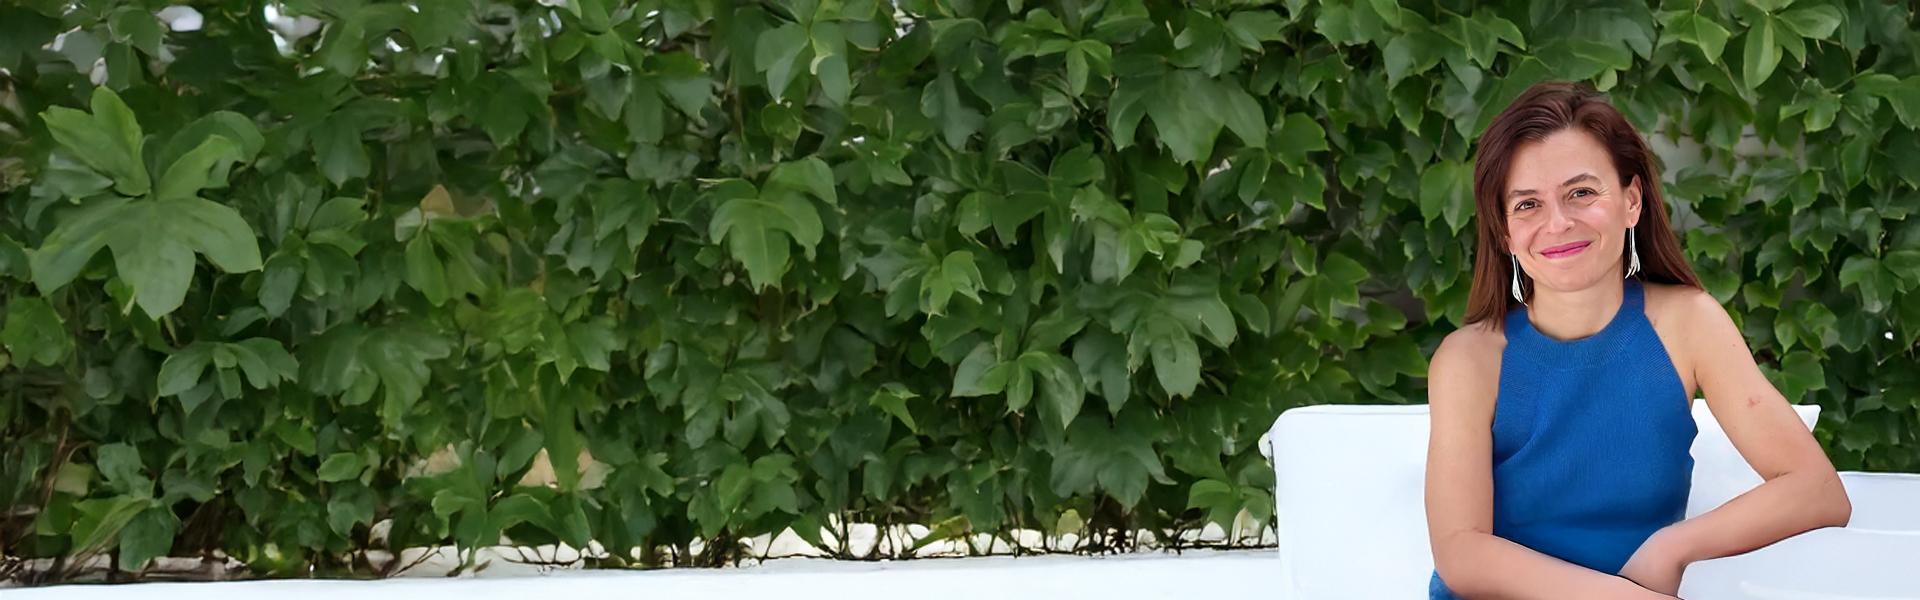

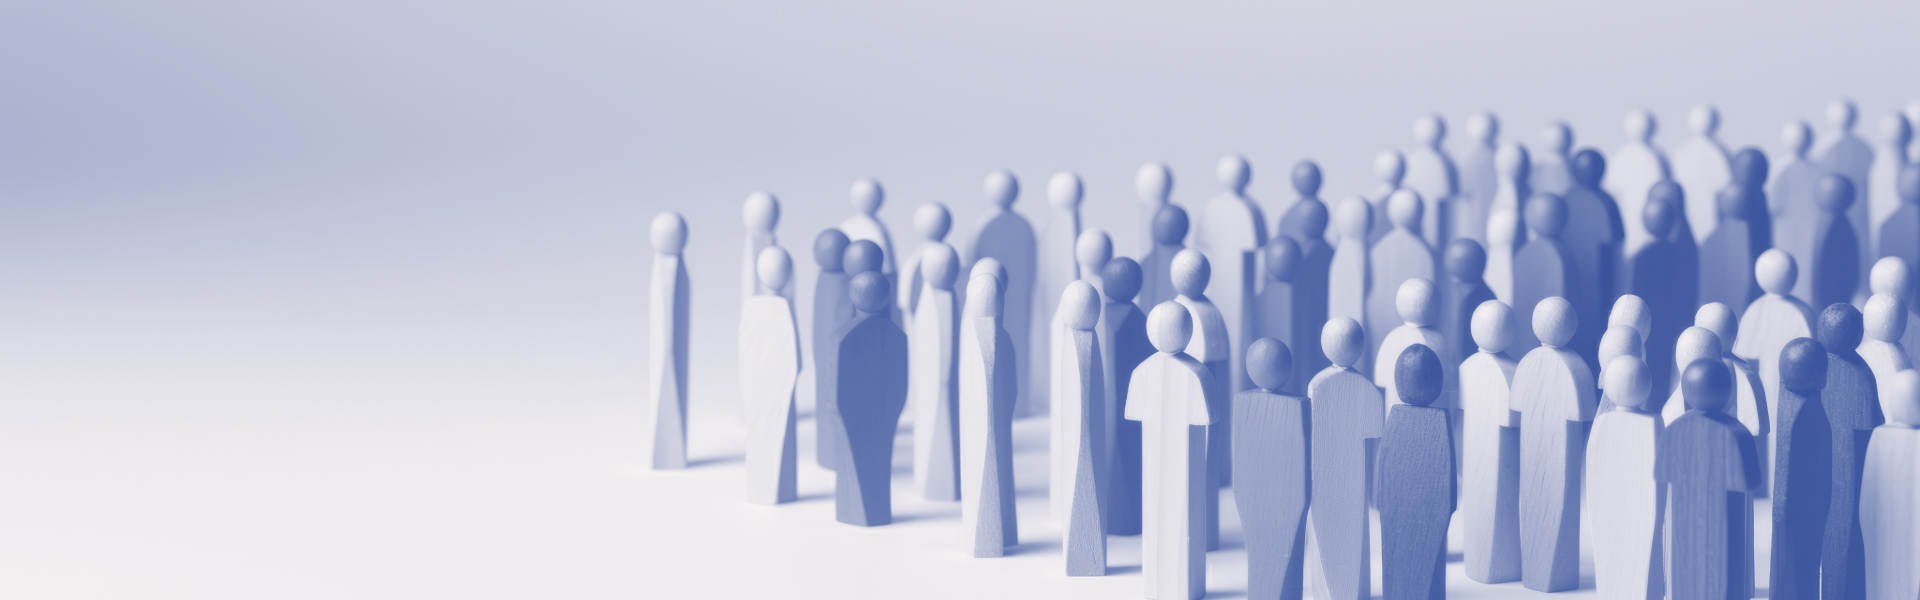

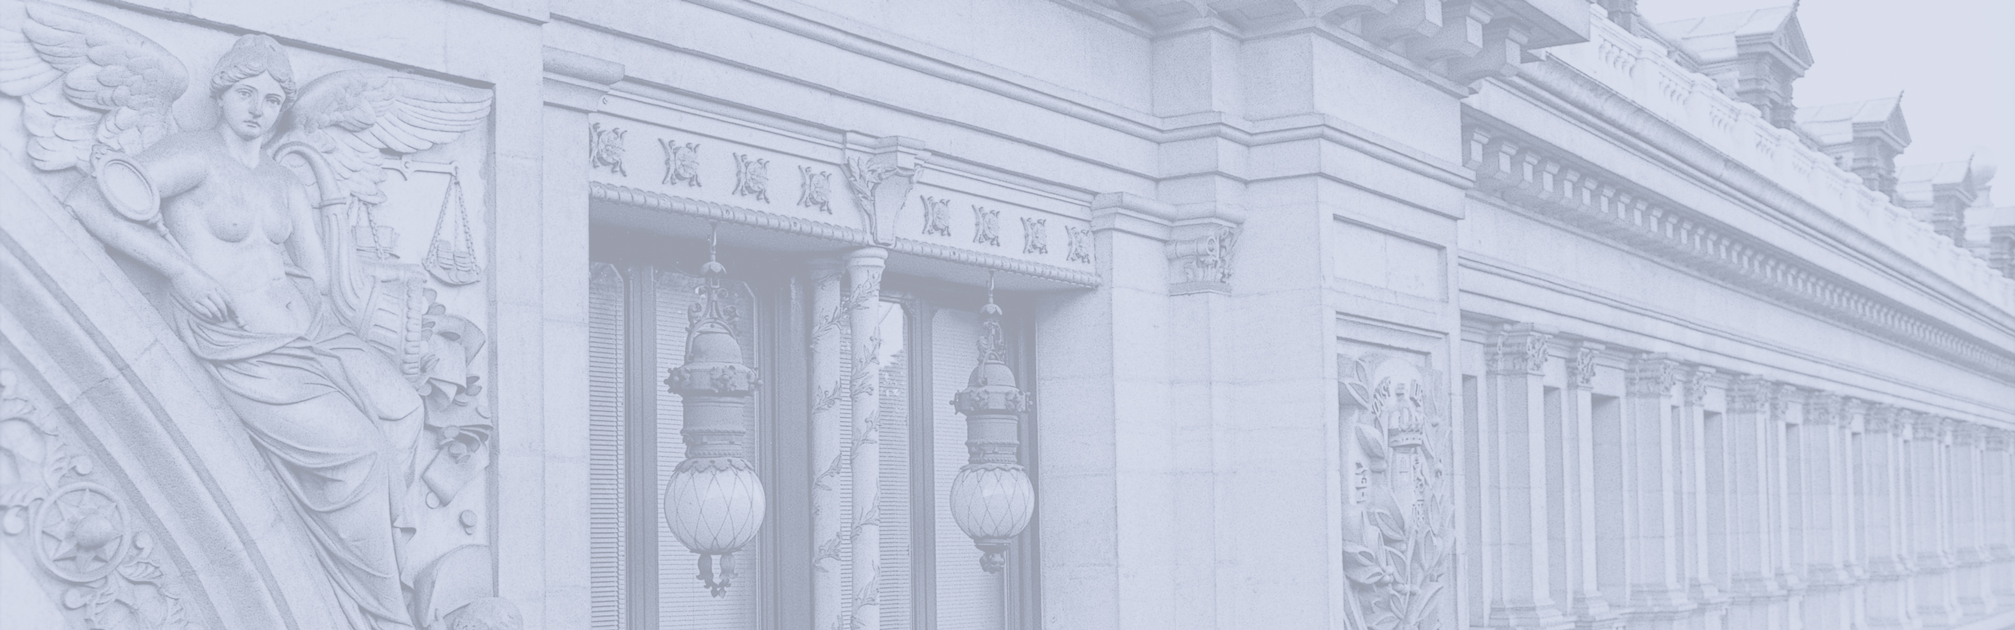

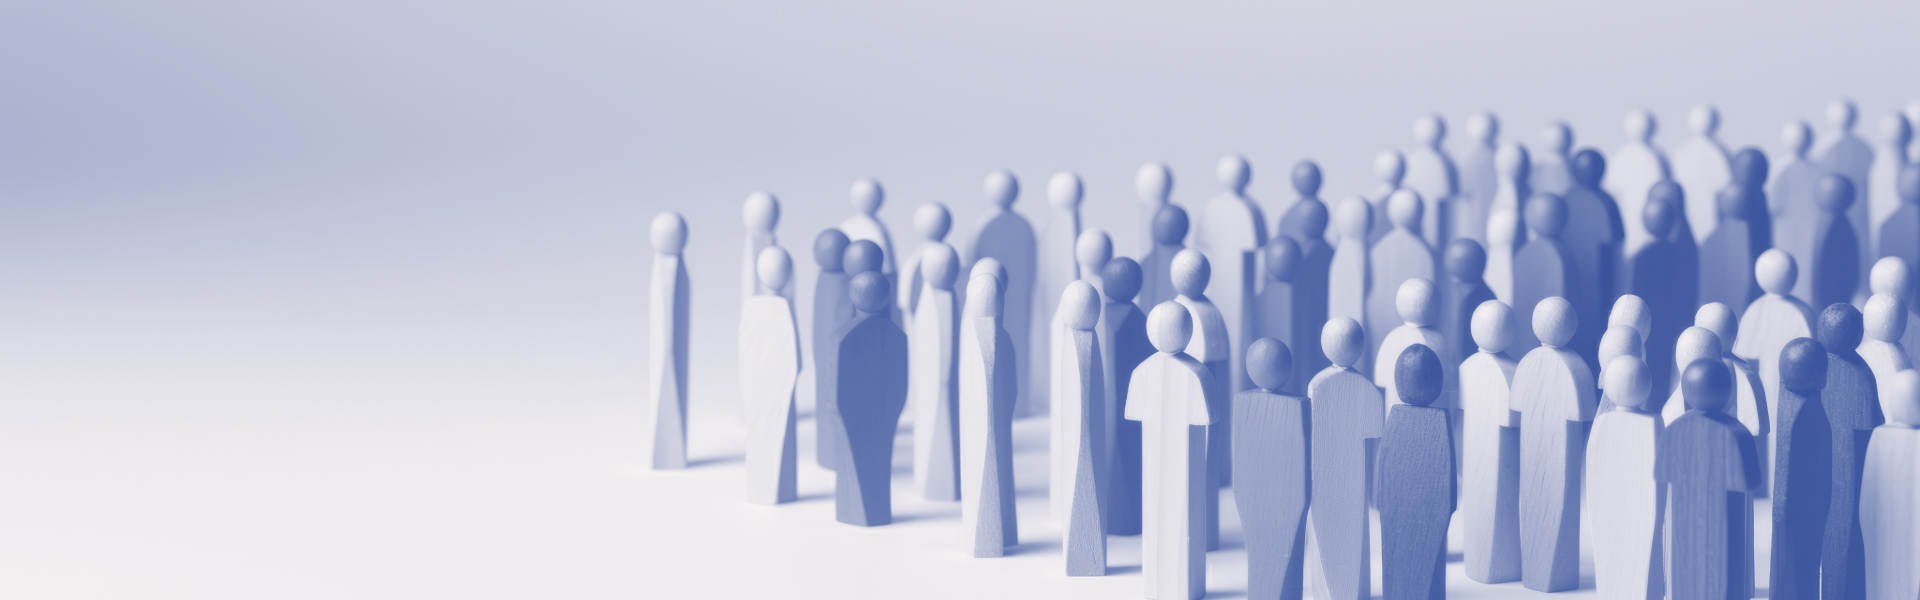

In [17]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display
from io import BytesIO

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es"  # Replace with the actual URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully accessed the webpage!")
else:
    print("Failed to access the webpage.")

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Locate the carousel items
carousel_items = soup.find('div', id='carousel-portada').find_all('div', class_='carousel-item')

# Step 4: Extract image sources
carousel_images = []
for item in carousel_items:
    img_src = item.find('img')['src']
    # Make sure to use the full URL if the src is relative
    if not img_src.startswith('http'):
        img_src = url + img_src
    carousel_images.append(img_src)

# Step 5: Display images in Google Colab
for img_url in carousel_images:
    # Fetch the image
    img_response = requests.get(img_url)

    # Display the image using raw content
    display(Image(img_response.content))


### **5.7. Scraping the Academic Planning of their Master**

This code demonstrates how to extract the academic planning of the Master (modules, courses, and professors) from the CEMFI website:

1. Send a GET request to the page that lists the Master courses and modules: `https://www.cemfi.es/programs/master/course_description.asp`.
2. Parse the HTML using BeautifulSoup to navigate the document.
3. Locate each module block by selecting the container `div` elements with class `table table-responsive p-3 tbl-4 mt-5 mb-0`.
4. For each module block:
   - Read the module name from the header `<th>` inside the table `<thead>`.
   - Find the inner `<table class='w-100'>` and iterate over its `<tbody>` rows.
   - Skip the header row and extract two columns from each remaining row:
     - Column 1: course name.
     - Column 2: professor name.
5. Append the extracted values to lists and assemble them into a pandas DataFrame with columns `Module`, `Course`, and `Professor`.

The output is a DataFrame (`df`) listing every Course and Professor grouped by Module, suitable for filtering, grouping, or export.

In [18]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es/programs/master/course_description.asp"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully accessed the webpage!")
else:
    print("Failed to access the webpage.")

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all divs that contain the tables
table_divs = soup.find_all('div', class_='table table-responsive p-3 tbl-4 mt-5 mb-0')

# Initialize lists to hold the extracted data
modules = []
courses = []
professors = []

# Step 4: Loop through each table div and extract the data
for table_div in table_divs:
    # Extract the module name from the <th> tag in the <thead>
    module_name = table_div.find('th').get_text(strip=True)

    # Find the table and then loop through each row in the table body
    table = table_div.find('table', class_='w-100')
    for row in table.find('tbody').find_all('tr')[1:]:  # Skipping the header row
        columns = row.find_all('td')
        course_name = columns[0].get_text(strip=True)
        professor_name = columns[1].get_text(strip=True)

        # Append the extracted data to the lists
        modules.append(module_name)
        courses.append(course_name)
        professors.append(professor_name)

# Step 5: Create a DataFrame from the extracted data
df = pd.DataFrame({
    'Module': modules,
    'Course': courses,
    'Professor': professors
})

# Display the DataFrame
df


Successfully accessed the webpage!


,Module,Course,Professor
0,Preliminary Module,Mathematics,Dante Amengual
1,Module I: Core courses / Term 1,Microeconomics,Guillermo Caruana
2,Module I: Core courses / Term 1,Macroeconomics I,Josep Pijoan-Mas
3,Module I: Core courses / Term 1,Statistical Methods in Econometrics,Pedro Mira
4,Module I: Core courses / Term 2,Uncertainty and Information,Guillermo Caruana
5,Module I: Core courses / Term 2,Macroeconomics II,Nezih Guner
6,Module I: Core courses / Term 2,Econometrics,Iván Fernánzez-Val
7,Module II: Elective courses / Term 3,Markets and Organizations,Gerard Llobet
8,Module II: Elective courses / Term 3,Quantitative Macroeconomics,Federico Kochen
9,Module II: Elective courses / Term 3,Corporate Finance,Javier Suarez


### **5.8. Scraping Profiles from the Faculty**

This code demonstrates how to extract key profile information for each CEMFI faculty member:

1. **Send a GET request** to the faculty page and retrieve its HTML content: `https://www.cemfi.es/people/faculty/index.asp`.
2. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
3. **Locate faculty entries** by finding all `div.item-perso` containers.
4. **Extract details for each member** by:
    - Getting the name from the `<h3>` element.
    - Getting the profile link from the enclosing `<a>` tag.
    - Getting degree and institution from the first `<p>`.
    - Getting the position from the `<p class='g-bold'>`.
    - Getting fields of research from the `<p class='g-book'>`.
5. **Store the results** in a list of dictionaries and convert it to a pandas DataFrame for easy viewing.

The output is a DataFrame (`df_faculty`) listing each member’s Name, Profile Link, Degree and Institution, Position, and Fields.

In [19]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es/people/faculty/index.asp"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully accessed the webpage!")
else:
    print("Failed to access the webpage.")

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all the faculty member entries
faculty_divs = soup.find_all('div', class_='item-perso')

# Step 4: Iterate over each faculty member entry to extract information
faculty_data = []
for faculty in faculty_divs:
    # Extract name
    name = faculty.find('h3').get_text(strip=True)

    # Extract profile link
    profile_link = faculty.find('a')['href']

    # Extract degree and institution
    degree_institution = faculty.find_all('p')[0].get_text(strip=True)

    # Extract position
    position = faculty.find('p', class_='g-bold').get_text(strip=True)

    # Extract fields of research
    fields = faculty.find('p', class_='g-book').get_text(strip=True)

    # Append the extracted data to the list
    faculty_data.append({
        'Name': name,
        'Profile Link': profile_link,
        'Degree and Institution': degree_institution,
        'Position': position,
        'Fields': fields
    })

# Convert the list of dictionaries to a pandas DataFrame
df_faculty = pd.DataFrame(faculty_data)

df_faculty


Successfully accessed the webpage!


,Name,Profile Link,Degree and Institution,Position,Fields
0,Dante Amengual,profile.asp?u=amengual,"PhD in Economics,Princeton University",Associate Professor with Tenure,"Fields: Time-series Econometrics, Financial Ec..."
1,Manuel Arellano,profile.asp?u=arellano,"PhD in Economics,London School of Economics",Professor,"Fields: Econometrics, Labor Economics"
2,Dmitry Arkhangelsky,profile.asp?u=darkhangel,"PhD in Business Administration,Stanford GSB",Associate Professor with Tenure,"Fields: Microeconometrics, Applied Econometrics"
3,Samuel Bentolila,profile.asp?u=sbc,"PhD in Economics,Massachusetts Institute of Te...",Professor,"Fields: Labor Economics, Economics of Education"
4,Giulia Buccione,profile.asp?u=buccione,"PhD in Economics,Brown University",Assistant ProfessorStarting in October 2025,"Fields: Development Economics, Political Economy"
5,Guillermo Caruana,profile.asp?u=caruana,"PhD in Economics,Boston University",Associate Professor with Tenure,"Fields: Microeconomic Theory, Industrial Organ..."
6,Susanna Esteban,profile.asp?u=esteban,"PhD in Economics,University of Rochester",Associate Professor with Tenure,"Fields: Industrial Organization, Applied Micro..."
7,Natalia Fabra,profile.asp?u=fabra,"PhD in Economics,European University Institute",Professor,"Fields: Industrial Organization, Energy Economics"
8,Sebastián Fanelli,profile.asp?u=fanelli,"PhD in Economics,Massachusetts Institute of Te...",Associate Professor,"Fields: International Macroeconomics, Monetary..."
9,Nezih Guner,profile.asp?u=nezih.guner,"PhD in Economics,University of Rochester",Professor,"Fields: Macroeconomics, Labor Economics"


### **5.9. Scraping and Saving the Photos of the Faculty**

This code demonstrates how to collect and save profile photos of CEMFI faculty members to Google Drive:

1. **Mount Google Drive** so images can be saved to a persistent location.
2. **Send a GET request** to the faculty page and retrieve its HTML content.
3. **Parse the HTML** using BeautifulSoup to make it easy to navigate and search.
4. **Locate faculty entries** by finding all `div.item-perso` containers.
5. **Extract and download each image** by:
    - Getting the image `<img>` `src` URL from each entry.
    - Converting relative URLs to absolute if necessary.
    - Building a filename from the faculty member’s name.
    - Downloading and writing the image bytes to the target folder, with simple retry logic.

The output is a folder on Google Drive (e.g., `MyDrive/CEMFI_Faculty`) containing one image per faculty member, named after each person.

In [28]:
from pathlib import Path
notebook_dir = Path().resolve()
project_root = notebook_dir.parent
save_folder =  Path("output/1_2")

if running_in_colab:
    from google.colab import drive
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=True)
    # Define the folder path where images will be saved
    save_folder = Path('/content/drive/My Drive') / save_folder.relative_to(project_root)
    print(f"Images will be saved to: {save_folder}")
else:
    save_folder = project_root / save_folder

# Create directories using pathlib
save_folder.mkdir(parents=True, exist_ok=True)

In [29]:
from bs4 import BeautifulSoup
import requests
import time
from requests.exceptions import RequestException

# Step 1: Send a GET request to the webpage
url = "https://www.cemfi.es/people/faculty/index.asp"

try:
    response = requests.get(url)
    if response.status_code == 200:
        print("Successfully accessed the webpage!")
    else:
        print(f"Failed to access the webpage. Status code: {response.status_code}")
        response.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"An error occurred when trying to access the webpage: {e}")

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the faculty member entries
faculty_divs = soup.find_all('div', class_='item-perso')

# Function to download image with retries
def download_image(url, path, retries=3):
    attempt = 0
    while attempt < retries:
        try:
            img_data = requests.get(url).content
            with open(path, 'wb') as handler:
                handler.write(img_data)
            print(f"Image successfully downloaded: {path}")
            break
        except RequestException as e:
            print(f"Attempt {attempt+1} failed: {e}")
            attempt += 1
            time.sleep(2 ** attempt)  # Exponential backoff

# Iterate over each faculty member entry to extract image URLs and names
for faculty in faculty_divs:
    # Extract name
    name = faculty.find('h3').get_text(strip=True)

    # Extract image URL
    img_tag = faculty.find('img')
    if img_tag:
        img_url = img_tag['src']

        # Check if the image URL is relative and adjust it
        if img_url.startswith('..'):
            img_url = 'https://www.cemfi.es/' + img_url.replace('../', '')

        # Create a valid filename from the faculty member's name
        filename = f"{name.replace(' ', '_')}.jpg"
        save_path = save_folder / filename

        # Attempt to download the image
        download_image(img_url, save_path)

print("Image download process completed.")


Successfully accessed the webpage!
Image successfully downloaded: /Users/jesusvillotamiranda/Library/CloudStorage/OneDrive-UniversidaddeLaRioja/GitHub/Repository/CSS_DataScience_2025/output/1_2/Dante_Amengual.jpg
Image successfully downloaded: /Users/jesusvillotamiranda/Library/CloudStorage/OneDrive-UniversidaddeLaRioja/GitHub/Repository/CSS_DataScience_2025/output/1_2/Manuel_Arellano.jpg
Image successfully downloaded: /Users/jesusvillotamiranda/Library/CloudStorage/OneDrive-UniversidaddeLaRioja/GitHub/Repository/CSS_DataScience_2025/output/1_2/Dmitry_Arkhangelsky.jpg
Image successfully downloaded: /Users/jesusvillotamiranda/Library/CloudStorage/OneDrive-UniversidaddeLaRioja/GitHub/Repository/CSS_DataScience_2025/output/1_2/Samuel_Bentolila.jpg
Image successfully downloaded: /Users/jesusvillotamiranda/Library/CloudStorage/OneDrive-UniversidaddeLaRioja/GitHub/Repository/CSS_DataScience_2025/output/1_2/Giulia_Buccione.jpg
Image successfully downloaded: /Users/jesusvillotamiranda/Library/

---
---

<!-- Now that you are scraping experts... -->
<!-- Can you try to scrape the profiles of the Economics Department Faculty @ Cambridge? (https://www.econ.cam.ac.uk/people/academic-staff) -->